In [1]:
import fasttext
import pandas as pd
import numpy as np
import json

In [2]:
from ascii_preprocessing import preprocess_text_to_ascii, prepare_fasttext_input

# Code/No-Code model

In [3]:
LABELS_MAPPING_BINARY = {
    "OTHER": "0",
    "CODE": "1",
}

In [4]:
### data loading
with open('../tg_dataset_part_2.json', 'r') as f:
    data = json.load(f)

tg_df = pd.DataFrame(data)
tg_df['class_name'] = tg_df['class_name'].str.rstrip('.txt')
tg_df['class_name'] = tg_df['class_name'].map(LABELS_MAPPING_BINARY)

In [5]:
tg_df_prepared = tg_df
tg_df_prepared['text_cleaned_ascii'] = tg_df['text'].apply(preprocess_text_to_ascii)

# TODO: Separate it to 2 training and validation datasets before - load accordingly

In [6]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(tg_df_prepared['text_cleaned_ascii'], tg_df_prepared['class_name'], random_state=42)

In [7]:
train_set = pd.concat([train_X, train_y], axis=1).rename(columns={"class_name": "class"})
val_set = pd.concat([val_X, val_y], axis=1).rename(columns={"class_name": "class"})

In [8]:
train_set_path = "../fasttext/train_set_binary.txt"
val_set_path = "../fasttext/val_set_binary.txt"

In [9]:
# train_set[train_set['text_cleaned_ascii'].str.contains('! !')]

In [10]:
prepare_fasttext_input(train_set, train_set_path)
prepare_fasttext_input(val_set, val_set_path)

### Training itself

In [ ]:
fasttext_model_binary = fasttext.train_supervised(
    input=train_set_path,
    thread=8,
    autotuneValidationFile=val_set_path,
    autotuneDuration=500,
    autotuneModelSize='4М'
)

In [ ]:
# val_set['class'] = '__label__' + val_set['class']

In [ ]:
predictions = [fasttext_model_binary.predict(value)[0][0] for value in val_set['text_cleaned_ascii']]

from sklearn.metrics import f1_score
f1_score(predictions, val_set['class'], average='macro')

In [ ]:
BINARY_MODEL_SAVE_PATH = "../fasttext/fasttext_model_binary.bin"

In [ ]:
fasttext_model_binary.save_model(BINARY_MODEL_SAVE_PATH)

# Multiclass model

In [6]:
PART_2_LANGS = [
  "TGLANG_LANGUAGE_C",
  "TGLANG_LANGUAGE_CPLUSPLUS",
  "TGLANG_LANGUAGE_CSHARP",
  "TGLANG_LANGUAGE_CSS",
  "TGLANG_LANGUAGE_DART",
  "TGLANG_LANGUAGE_DOCKER",
  "TGLANG_LANGUAGE_FUNC",
  "TGLANG_LANGUAGE_GO",
  "TGLANG_LANGUAGE_HTML",
  "TGLANG_LANGUAGE_JAVA",
  "TGLANG_LANGUAGE_JAVASCRIPT",
  "TGLANG_LANGUAGE_JSON",
  "TGLANG_LANGUAGE_KOTLIN",
  "TGLANG_LANGUAGE_LUA",
  "TGLANG_LANGUAGE_NGINX",
  "TGLANG_LANGUAGE_OBJECTIVE_C",
  "TGLANG_LANGUAGE_PHP",
  "TGLANG_LANGUAGE_POWERSHELL",
  "TGLANG_LANGUAGE_PYTHON",
  "TGLANG_LANGUAGE_RUBY",
  "TGLANG_LANGUAGE_RUST",
  "TGLANG_LANGUAGE_SHELL",
  "TGLANG_LANGUAGE_SOLIDITY",
  "TGLANG_LANGUAGE_SQL",
  "TGLANG_LANGUAGE_SWIFT",
  "TGLANG_LANGUAGE_TL",
  "TGLANG_LANGUAGE_TYPESCRIPT",
  "TGLANG_LANGUAGE_XML"
]

part_2_mappings = {value: str(idx + 1) for idx, value in enumerate(PART_2_LANGS)}
reverse_part_2_mappings = {str(idx + 1): value for idx, value in enumerate(PART_2_LANGS)}

In [7]:
part_2_mappings

{'TGLANG_LANGUAGE_C': '1',
 'TGLANG_LANGUAGE_CPLUSPLUS': '2',
 'TGLANG_LANGUAGE_CSHARP': '3',
 'TGLANG_LANGUAGE_CSS': '4',
 'TGLANG_LANGUAGE_DART': '5',
 'TGLANG_LANGUAGE_DOCKER': '6',
 'TGLANG_LANGUAGE_FUNC': '7',
 'TGLANG_LANGUAGE_GO': '8',
 'TGLANG_LANGUAGE_HTML': '9',
 'TGLANG_LANGUAGE_JAVA': '10',
 'TGLANG_LANGUAGE_JAVASCRIPT': '11',
 'TGLANG_LANGUAGE_JSON': '12',
 'TGLANG_LANGUAGE_KOTLIN': '13',
 'TGLANG_LANGUAGE_LUA': '14',
 'TGLANG_LANGUAGE_NGINX': '15',
 'TGLANG_LANGUAGE_OBJECTIVE_C': '16',
 'TGLANG_LANGUAGE_PHP': '17',
 'TGLANG_LANGUAGE_POWERSHELL': '18',
 'TGLANG_LANGUAGE_PYTHON': '19',
 'TGLANG_LANGUAGE_RUBY': '20',
 'TGLANG_LANGUAGE_RUST': '21',
 'TGLANG_LANGUAGE_SHELL': '22',
 'TGLANG_LANGUAGE_SOLIDITY': '23',
 'TGLANG_LANGUAGE_SQL': '24',
 'TGLANG_LANGUAGE_SWIFT': '25',
 'TGLANG_LANGUAGE_TL': '26',
 'TGLANG_LANGUAGE_TYPESCRIPT': '27',
 'TGLANG_LANGUAGE_XML': '28'}

In [8]:
train_set_og = pd.read_json('old_full_dataset_train.json')
valid_set_og = pd.read_json('old_full_dataset_valid.json')

In [9]:
train_set = train_set_og[train_set_og['class'].isin(PART_2_LANGS)]
valid_set = valid_set_og[valid_set_og['class'].isin(PART_2_LANGS)]

In [10]:
train_set['class'] = train_set['class'].map(part_2_mappings)
valid_set['class'] = valid_set['class'].map(part_2_mappings)

/var/folders/48/0840htmx3sj8ggmt27x29n4m0000gn/T/ipykernel_80889/979453287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['class'] = train_set['class'].map(part_2_mappings)
/var/folders/48/0840htmx3sj8ggmt27x29n4m0000gn/T/ipykernel_80889/979453287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['class'] = valid_set['class'].map(part_2_mappings)


In [11]:
train_set['text_cleaned_ascii'] = train_set['text_og'].apply(preprocess_text_to_ascii)
valid_set['text_cleaned_ascii'] = valid_set['text_og'].apply(preprocess_text_to_ascii)

/var/folders/48/0840htmx3sj8ggmt27x29n4m0000gn/T/ipykernel_80889/1942638028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['text_cleaned_ascii'] = train_set['text_og'].apply(preprocess_text_to_ascii)
/var/folders/48/0840htmx3sj8ggmt27x29n4m0000gn/T/ipykernel_80889/1942638028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['text_cleaned_ascii'] = valid_set['text_og'].apply(preprocess_text_to_ascii)


In [12]:
train_dataset_path = '../fasttext/train_fasttext_input_28.txt'
valid_dataset_path = '../fasttext/valid_fasttext_input_28.txt'

prepare_fasttext_input(train_set, train_dataset_path)
prepare_fasttext_input(valid_set, valid_dataset_path)

/Users/antonmasiukevich/Desktop/Courses/tgcomp/notebooks/ascii_preprocessing.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['class'] = "__label__" + dataframe['class']


,text_cleaned_ascii,text_og,class
3297,/ * <newline> Unless required by applicable l...,/*\n\n\n\nUnless required by applicable law or...,__label__8
16865,{ - <newline> TASK <num_int> - Merge hashmaps...,{-\n\n TASK 2 - Merge hashmaps (dictionaries)...,__label__7
1295,/ / <newline> / / UIViewController + Scrollin...,//\n// UIViewController+ScrollingStatusBar.h\...,__label__1
3898,/ * <newline> * <newline> * <newline> * <newl...,/*\n *\n *\n *\n * Unless required by applicab...,__label__10
3312,/ * <newline> * Tencent is pleased to support...,/*\n * Tencent is pleased to support the open ...,__label__8
...,...,...,...
5051,/ * <newline> <newline> <newline> This file i...,/*\r\n \r\n\r\n This file is part of the JU...,__label__16
2433,import ' package : flutter / material . dart '...,import 'package:flutter/material.dart';\nimpor...,__label__5
16850,; ; testable <newline> ( ) recv_internal ( sl...,\n;; testable\n() recv_internal(slice in_msg_b...,__label__7
6265,# DO NOT MODIFY . THIS CODE IS GENERATED . CH...,\n# DO NOT MODIFY. THIS CODE IS GENERATED. CHA...,__label__20


### Training itself

In [26]:
model = fasttext.train_supervised(
    input=train_dataset_path,
    thread=8,
    autotuneValidationFile=valid_dataset_path,
    autotuneDuration=500,
    autotuneModelSize='5M'
)

Progress: 100.0% Trials:   12 Best score:  0.845946 ETA:   0h 0m 0s
Training again with best arguments
Read 4M words
Number of words:  111657
Number of labels: 28
Progress: 100.0% words/sec/thread:  941012 lr:  0.000000 avg.loss:  0.614051 ETA:   0h 0m 0s
Progress: 100.0% words/sec/thread: 1741405 lr:  0.000000 avg.loss:  0.016402 ETA:   0h 0m 0s


In [27]:
### evaluation
from sklearn.metrics import f1_score, classification_report

from tqdm import tqdm

predicted = [model.predict(sentence)[0][0] for sentence in tqdm(valid_set.text_cleaned_ascii)]
f1_score(valid_set['class'], predicted, average='macro')

100%|███████████████████████████████████████| 740/740 [00:00<00:00, 1422.10it/s]


0.8479301003391927

In [28]:
report_fasttext = pd.DataFrame(
    classification_report(
        valid_set['class'].str.lstrip('__label__').map(reverse_part_2_mappings),
        pd.Series(predicted).str.lstrip('__label__').map(reverse_part_2_mappings),
        output_dict=True
    )
).T.reset_index()

In [29]:
report_fasttext

,index,precision,recall,f1-score,support
0,TGLANG_LANGUAGE_C,0.647059,0.578947,0.611111,19.000000
1,TGLANG_LANGUAGE_CPLUSPLUS,0.590909,0.684211,0.634146,19.000000
2,TGLANG_LANGUAGE_CSHARP,0.958333,0.851852,0.901961,27.000000
3,TGLANG_LANGUAGE_CSS,0.958333,0.884615,0.920000,26.000000
4,TGLANG_LANGUAGE_DART,0.866667,0.962963,0.912281,27.000000
5,TGLANG_LANGUAGE_DOCKER,0.900000,0.900000,0.900000,30.000000
6,TGLANG_LANGUAGE_FUNC,0.935484,0.935484,0.935484,31.000000
7,TGLANG_LANGUAGE_GO,0.913043,0.840000,0.875000,25.000000
8,TGLANG_LANGUAGE_HTML,0.675676,0.892857,0.769231,28.000000
9,TGLANG_LANGUAGE_JAVA,0.833333,0.869565,0.851064,23.000000


In [30]:
valid_set.to_json("valid_set_for_testing.json")

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_labels = [f"{label}" for label in PART_2_LANGS]
confusion_matrix_result = confusion_matrix(
    valid_set['class'].str.lstrip('__label__').map(reverse_part_2_mappings),
    pd.Series(predicted).str.lstrip('__label__').map(reverse_part_2_mappings),
    labels=class_labels
)

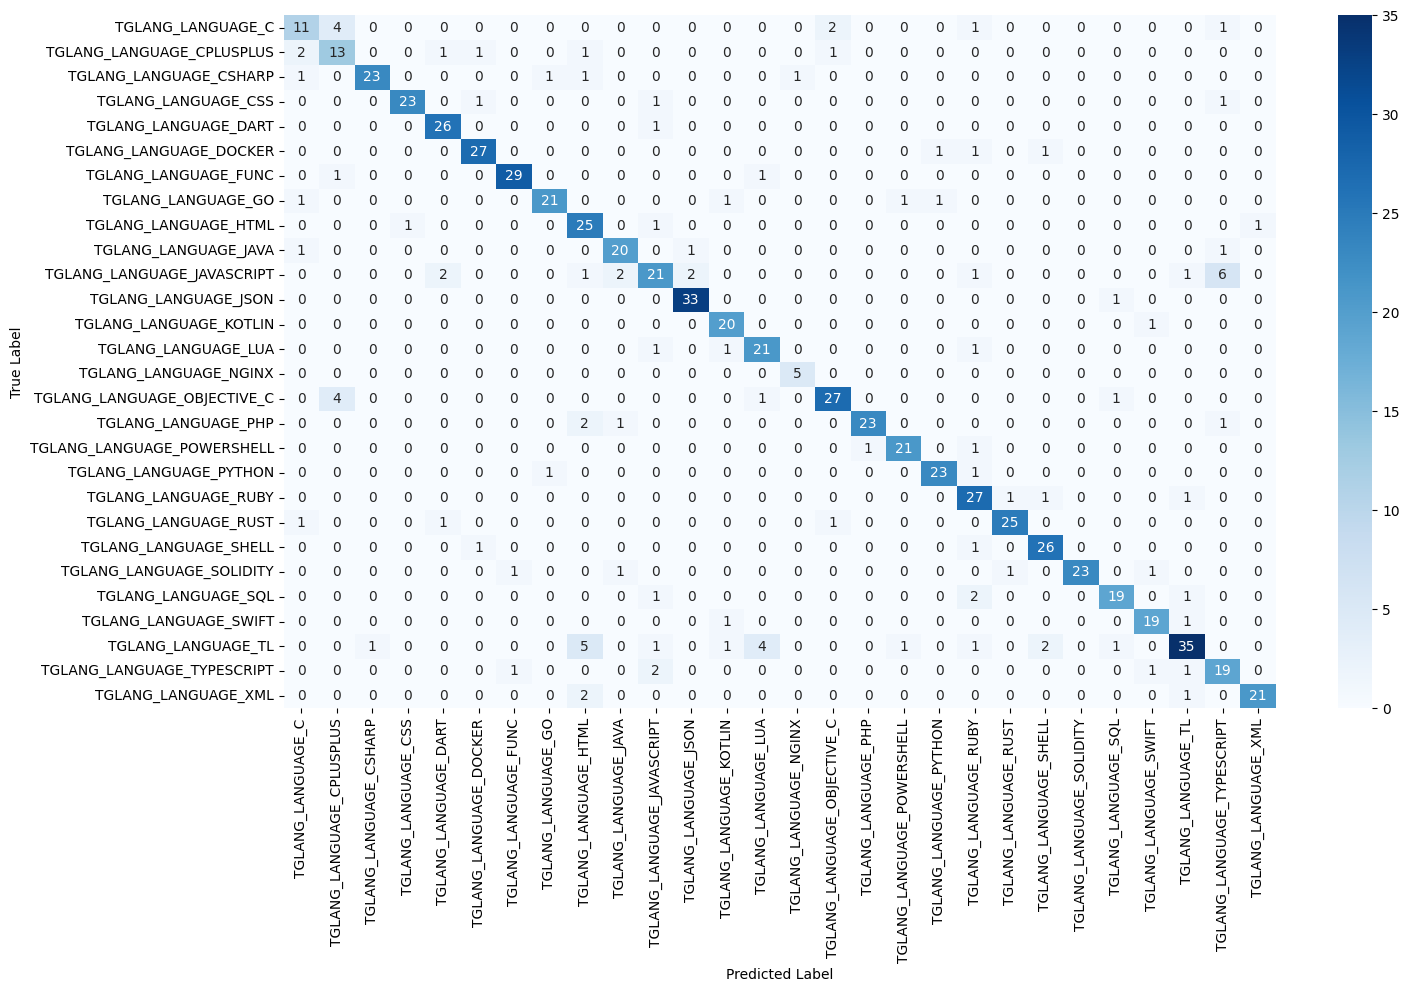

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [33]:
model.save_model('../fasttext/multiclass_model_5М.bin')

In [1]:
# !pip install pandoc

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.3 MB/s eta 0:00:00
  DEPRECATION: pandoc is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for pandoc ... done

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
